##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [1]:
%pip install -U -q 'google-genai>=1.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 5.0 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [6]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

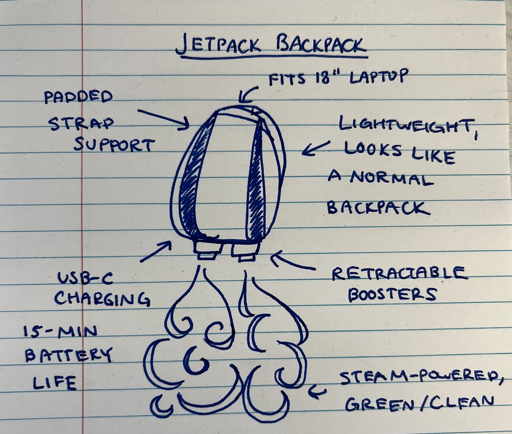

## Tired of Traffic? Meet Your New Commute: The Jetpack Backpack!

Ever dreamt of simply *soaring* over rush hour? Of ditching crowded trains and gridlocked roads for the open sky? Well, a fantastic sketch we spotted might just be hinting at our future: The **Jetpack Backpack**!

This isn't your average clunky contraption. The brilliant mind behind this concept envisions a truly seamless integration of daily utility and futuristic flight.

**Here's what makes this "Jetpack Backpack" a game-changer:**

*   **Looks Like a Normal Backpack:** First things first, it's discreet! You wouldn't know it's a personal flight device just by looking. It even "fits an 18-inch laptop," making it perfect for the modern professional.
*   **Comfort & Convenience:** Padded strap support ensures it's comfortable for everyday wear, and it's designed to be lightweight. When it's time to power up, it features universal **USB-C charging**.
*   **Ready for Take-Off (Subtly!):** The magic happens with its **retractable boosters**. No need for bulky protrusions until you're ready to fly!
*   **Green & Clean Flight:** Forget noisy, polluting engines. This genius concept is **steam-powered**, proudly "green/clean," so you can zip through the air with a clear conscience.
*   **Perfect for Short Hops:** While the **15-min battery life** means it's not for cross-country trips (yet!), it's ideal for those quick escapes from a particularly nasty traffic jam or a short commute across town. Imagine breezing past gridlock, feeling the wind, and arriving at your destination refreshed and on time!

While still a concept, this "Jetpack Backpack" sparks our imagination and highlights a desire for cleaner, more efficient, and undeniably cooler ways to get around. What do you think? Would you trade your daily commute for a few minutes in the sky? The future looks lighter, cleaner, and a whole lot more exciting!

In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Okay, listen up, little fluff-butt! *Squeak! Squeak!*

Imagine you have a super-duper important *squeaky toy message* you want to send to your friend, the fluffy poodle across the park. *Woof!*

1.  **Your Squeaky Message:** You give your *squeaky toy message* (that's like a picture of a squirrel, or a video of you zoomies!) to your **doggy door** – that's your internet box! *Wiggle, wiggle!*

2.  **The Doggy Door:** Your doggy door is super smart! It knows how to send your squeaky message out into the big, wide world. *Sniff, sniff!*

3.  **The Sniffy Trails & Chew Ropes:** Your squeaky message then zooms along *invisible sniffy trails* (that's Wi-Fi!) or sometimes a *long, chewable rope* (that's a cable!). These are like the paths in the park, but super fast! *Zoom! Zoom!*

4.  **The Giant Toy Box Dogs:** These trails lead to *GIANT, friendly dogs* who have *mountains of squeaky toys*! These big dogs are like the super-duper toy storage places (servers!). They hold *all* the squeaky pictures and videos and barks from *everywhere*! *Woof! Woof!*

5.  **The Super-Sniffer Dog:** But how does your squeaky message know *which* giant dog to go to, and *which* poodle to find? There's a *super-sniffer dog* who knows *all the scents*! He's like the librarian of smells. He sniffs your squeaky message and says, "Aha! This squeaky toy needs to go to the poodle with the pink collar!" *Sniff, sniff, bark!*

6.  **The Special Scent Mark:** Every squeaky toy message has a *special scent mark* on it, like your own unique puppy smell! That's how the giant dogs know exactly where to send it. *Pounce!*

7.  **The Rules of the Squeak:** All the squeaky messages follow the *rules of the squeak* – like, don't bite too hard, wait your turn, and always bring the toy back! This keeps everything fair and fun. *Good boy!*

8.  **Delivery!** So, your squeaky message zooms through the sniffy trails, past the giant toy box dogs, guided by the super-sniffer, until *ZOOM!* It pops out of the poodle's doggy door! *Squeak! Squeak!*

And then, the poodle can send *you* a squeaky message back, maybe a picture of *her* favorite bone! It all goes the same way, back to your doggy door!

So, the internet is just a super big, super fast way for all the puppies (and humans!) to send *squeaky toy messages* to each other, using invisible sniffy trails and giant toy box dogs! *Happy tail wags!* Now go chase that tail!

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [12]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say:

1.  "Real original, universe. Is that the best 'cosmic lesson' you could come up with?"
2.  "Yeah, real subtle, universe. You clearly weren't paying attention when you laid out this whole 'reality' thing."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [13]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [14]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

You're looking for a function that determines if a given year is a leap year. The rules for a leap year are as follows:

1.  A year **is** a leap year if it is evenly divisible by 4,
2.  **UNLESS** it is evenly divisible by 100,
3.  **EXCEPT THAT** it is a leap year if it is evenly divisible by 400.

This can be summarized as: a year is a leap year if it's divisible by 400, OR if it's divisible by 4 but not by 100.

Here's a function implementation in Python, along with explanations and examples.

---

### Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if:
    - It is divisible by 4, UNLESS
    - It is divisible by 100, EXCEPT THAT
    - It is a leap year if it is divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        # While the Gregorian calendar wasn't adopted universally until later,
        # and the concept of leap years has historical nuances,
        # for practical purposes, we often consider positive years.
        # Adjust this check based on specific historical requirements if any.
        raise ValueError("Year must be a non-negative integer for this calculation.")

    # Rule 3: Divisible by 400 (e.g., 2000, 2400)
    if year % 400 == 0:
        return True
    # Rule 2: Divisible by 100 but not by 400 (e.g., 1900, 2100)
    elif year % 100 == 0:
        return False
    # Rule 1: Divisible by 4 but not by 100 (e.g., 2004, 2008)
    elif year % 4 == 0:
        return True
    # Not divisible by 4 (e.g., 2003, 2007)
    else:
        return False

# --- More concise version ---
def is_leap_year_concise(year: int) -> bool:
    """
    Checks if a given year is a leap year (concise version).
    """
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        raise ValueError("Year must be a non-negative integer for this calculation.")

    return (year % 400 == 0) or \
           (year % 4 == 0 and year % 100 != 0)

# --- Test Cases ---
if __name__ == "__main__":
    print("--- Using detailed function ---")
    print(f"2000 is a leap year: {is_leap_year(2000)} (Expected: True)")  # Divisible by 400
    print(f"1900 is a leap year: {is_leap_year(1900)} (Expected: False)") # Divisible by 100, not 400
    print(f"2004 is a leap year: {is_leap_year(2004)} (Expected: True)")  # Divisible by 4, not 100
    print(f"2003 is a leap year: {is_leap_year(2003)} (Expected: False)") # Not divisible by 4
    print(f"1600 is a leap year: {is_leap_year(1600)} (Expected: True)")
    print(f"2100 is a leap year: {is_leap_year(2100)} (Expected: False)")
    print(f"2024 is a leap year: {is_leap_year(2024)} (Expected: True)")
    print(f"2023 is a leap year: {is_leap_year(2023)} (Expected: False)")

    print("\n--- Using concise function ---")
    print(f"2000 is a leap year: {is_leap_year_concise(2000)} (Expected: True)")
    print(f"1900 is a leap year: {is_leap_year_concise(1900)} (Expected: False)")
    print(f"2004 is a leap year: {is_leap_year_concise(2004)} (Expected: True)")
    print(f"2003 is a leap year: {is_leap_year_concise(2003)} (Expected: False)")

    try:
        is_leap_year("abc")
    except TypeError as e:
        print(f"\nCaught expected error: {e}")
    try:
        is_leap_year(-100)
    except ValueError as e:
        print(f"Caught expected error: {e}")
```

---

### Explanation

1.  **Divisible by 400**: The most specific rule. If a year is divisible by 400 (e.g., 2000, 1600), it's a leap year. This condition is checked first because it overrides the "divisible by 100" rule.
2.  **Divisible by 100 (but not 400)**: If a year is divisible by 100 but *not* by 400 (e.g., 1900, 2100), it's *not* a leap year. This is an exception to the "divisible by 4" rule.
3.  **Divisible by 4 (but not 100)**: If a year is divisible by 4 but *not* by 100 (e.g., 2004, 2024), it's a leap year. This is the general rule.
4.  **Not Divisible by 4**: If none of the above conditions are met (i.e., the year is not divisible by 4), it's not a leap year (e.g., 2003, 2023).

The `is_leap_year_concise` function expresses these rules in a single boolean logic statement, which is often preferred for its brevity in Python. Both versions are functionally identical. I've also added some basic input validation for robustness.

---

### Other Languages (Conceptual Examples)

The logic remains the same across programming languages. Here's how you might write it in other popular languages:

#### JavaScript

```javascript
function isLeapYear(year) {
  if (typeof year !== 'number' || !Number.isInteger(year) || year < 0) {
    throw new Error("Year must be a non-negative integer.");
  }
  return (year % 400 === 0) || (year % 4 === 0 && year % 100 !== 0);
}

console.log(`2000 is a leap year: ${isLeapYear(2000)}`);
console.log(`1900 is a leap year: ${isLeapYear(1900)}`);
console.log(`2004 is a leap year: ${isLeapYear(2004)}`);
console.log(`2003 is a leap year: ${isLeapYear(2003)}`);
```

#### Java

```java
public class DateUtils {
    public static boolean isLeapYear(int year) {
        if (year < 0) {
            throw new IllegalArgumentException("Year must be a non-negative integer.");
        }
        return (year % 400 == 0) || ((year % 4 == 0) && (year % 100 != 0));
    }

    public static void main(String[] args) {
        System.out.println("2000 is a leap year: " + isLeapYear(2000));
        System.out.println("1900 is a leap year: " + isLeapYear(1900));
        System.out.println("2004 is a leap year: " + isLeapYear(2004));
        System.out.println("2003 is a leap year: " + isLeapYear(2003));
    }
}
```

#### C#

```csharp
using System;

public static class DateHelper
{
    public static bool IsLeapYear(int year)
    {
        if (year < 0)
        {
            throw new ArgumentOutOfRangeException(nameof(year), "Year must be a non-negative integer.");
        }
        return (year % 400 == 0) || ((year % 4 == 0) && (year % 100 != 0));
    }

    public static void Main(string[] args)
    {
        Console.WriteLine($"2000 is a leap year: {IsLeapYear(2000)}");
        Console.WriteLine($"1900 is a leap year: {IsLeapYear(1900)}");
        Console.WriteLine($"2004 is a leap year: {IsLeapYear(2004)}");
        Console.WriteLine($"2003 is a leap year: {IsLeapYear(2003)}");
    }
}
```

Here's another example using your new helpful coding assistant:

In [15]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write a unit test for the Python `is_leap_year` function. We'll use Python's built-in `unittest` module, which is a standard library for writing tests.

First, ensure you have the `is_leap_year` function defined, perhaps in a file named `date_utils.py` or similar. For this example, I'll assume the function is in the same file or imported correctly.

**`date_utils.py` (or wherever your function is)**

```python
# date_utils.py
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if:
    - It is divisible by 4, UNLESS
    - It is divisible by 100, EXCEPT THAT
    - It is a leap year if it is divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        raise ValueError("Year must be a non-negative integer for this calculation.")

    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False

# You can also include the concise version if you want to test that one instead/as well
def is_leap_year_concise(year: int) -> bool:
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        raise ValueError("Year must be a non-negative integer for this calculation.")
    return (year % 400 == 0) or \
           (year % 4 == 0 and year % 100 != 0)

```

**`test_date_utils.py` (your unit test file)**

```python
import unittest
# Assuming your is_leap_year function is in a file named date_utils.py
# If it's in the same file, you don't need this import.
from date_utils import is_leap_year # or from your_module_name import is_leap_year

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    # Test cases for valid leap years
    def test_divisible_by_400_is_leap(self):
        self.assertTrue(is_leap_year(2000), "Year 2000 should be a leap year (divisible by 400)")
        self.assertTrue(is_leap_year(1600), "Year 1600 should be a leap year (divisible by 400)")
        self.assertTrue(is_leap_year(2400), "Year 2400 should be a leap year (divisible by 400)")

    # Test cases for years divisible by 100 but not by 400 (not leap years)
    def test_divisible_by_100_not_400_is_not_leap(self):
        self.assertFalse(is_leap_year(1900), "Year 1900 should not be a leap year (divisible by 100, not 400)")
        self.assertFalse(is_leap_year(1800), "Year 1800 should not be a leap year (divisible by 100, not 400)")
        self.assertFalse(is_leap_year(2100), "Year 2100 should not be a leap year (divisible by 100, not 400)")

    # Test cases for years divisible by 4 but not by 100 (leap years)
    def test_divisible_by_4_not_100_is_leap(self):
        self.assertTrue(is_leap_year(2004), "Year 2004 should be a leap year (divisible by 4, not 100)")
        self.assertTrue(is_leap_year(2008), "Year 2008 should be a leap year (divisible by 4, not 100)")
        self.assertTrue(is_leap_year(2024), "Year 2024 should be a leap year (divisible by 4, not 100)")

    # Test cases for years not divisible by 4 (not leap years)
    def test_not_divisible_by_4_is_not_leap(self):
        self.assertFalse(is_leap_year(2003), "Year 2003 should not be a leap year (not divisible by 4)")
        self.assertFalse(is_leap_year(2007), "Year 2007 should not be a leap year (not divisible by 4)")
        self.assertFalse(is_leap_year(2023), "Year 2023 should not be a leap year (not divisible by 4)")
        self.assertFalse(is_leap_year(1), "Year 1 should not be a leap year")

    # Test edge case: Year 0 (depends on calendar system, but typically not considered in Gregorian rules)
    # The function as written would treat year 0 as a leap year (divisible by 400).
    # If your requirements differ for year 0, adjust the function or test accordingly.
    def test_year_zero(self):
        self.assertTrue(is_leap_year(0), "Year 0 should be considered a leap year by standard rules (divisible by 400).")

    # Test cases for invalid input: non-integer
    def test_invalid_input_type(self):
        with self.assertRaises(TypeError, msg="Should raise TypeError for non-integer input"):
            is_leap_year("2024")
        with self.assertRaises(TypeError, msg="Should raise TypeError for float input"):
            is_leap_year(2024.0)
        with self.assertRaises(TypeError, msg="Should raise TypeError for None input"):
            is_leap_year(None)

    # Test cases for invalid input: negative year
    def test_invalid_input_negative_year(self):
        with self.assertRaises(ValueError, msg="Should raise ValueError for negative year"):
            is_leap_year(-1)
        with self.assertRaises(ValueError, msg="Should raise ValueError for negative year"):
            is_leap_year(-2000)

# This allows you to run the tests directly from the command line
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

```

### How to Run the Tests

1.  **Save the files:**
    *   Save your function code as `date_utils.py`.
    *   Save the test code as `test_date_utils.py` in the same directory.
2.  **Open your terminal or command prompt.**
3.  **Navigate to the directory** where you saved these files.
4.  **Run the tests** using the following command:

    ```bash
    python -m unittest test_date_utils.py
    ```

    Alternatively, if you have `if __name__ == '__main__': unittest.main()` in your test file, you can simply run:

    ```bash
    python test_date_utils.py
    ```

### Explanation of the Unit Test

*   **`import unittest`**: Imports the testing framework.
*   **`from date_utils import is_leap_year`**: Imports the function we want to test. Adjust the import path if your file structure is different.
*   **`class TestIsLeapYear(unittest.TestCase):`**: Defines a test class that inherits from `unittest.TestCase`. This inheritance provides access to various assertion methods.
*   **`def test_...` methods**: Each method starting with `test_` is automatically discovered and run by the `unittest` framework.
    *   **`self.assertTrue(condition, message)`**: Asserts that `condition` is `True`. The `message` is optional and provides more context if the test fails.
    *   **`self.assertFalse(condition, message)`**: Asserts that `condition` is `False`.
    *   **`with self.assertRaises(ExceptionType, msg)`**: This is a context manager used to test if a specific exception is raised. If the code inside the `with` block *does not* raise the specified `ExceptionType`, the test will fail.
*   **Test Cases**:
    *   **Leap years (divisible by 400)**: `2000`, `1600`, `2400`.
    *   **Not leap years (divisible by 100 but not 400)**: `1900`, `1800`, `2100`.
    *   **Leap years (divisible by 4 but not 100)**: `2004`, `2008`, `2024`.
    *   **Not leap years (not divisible by 4)**: `2003`, `2007`, `2023`, `1`.
    *   **Edge Case**: `Year 0` (which by the Gregorian rule set is divisible by 400).
    *   **Error Handling**: Tests that `TypeError` is raised for non-integer inputs and `ValueError` for negative years.

This comprehensive set of tests ensures that your `is_leap_year` function behaves correctly according to the specified rules and handles invalid inputs gracefully.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [17]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [19]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The primary function name was `is_leap_year`.

I also provided a more concise version named `is_leap_year_concise`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [20]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these chocolate chip cookies are soft, chewy, and loaded with melty chocolate chips. Perfect for any occasion or just a sweet treat.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will create a 3D rendered image of a pink pig wearing a dark grey top hat, with small, feathery white wings, soaring through a brightly colored, utopian futuristic city filled with sleek buildings, flying vehicles, and abundant green trees and parks, all under a clear blue sky.


image/png


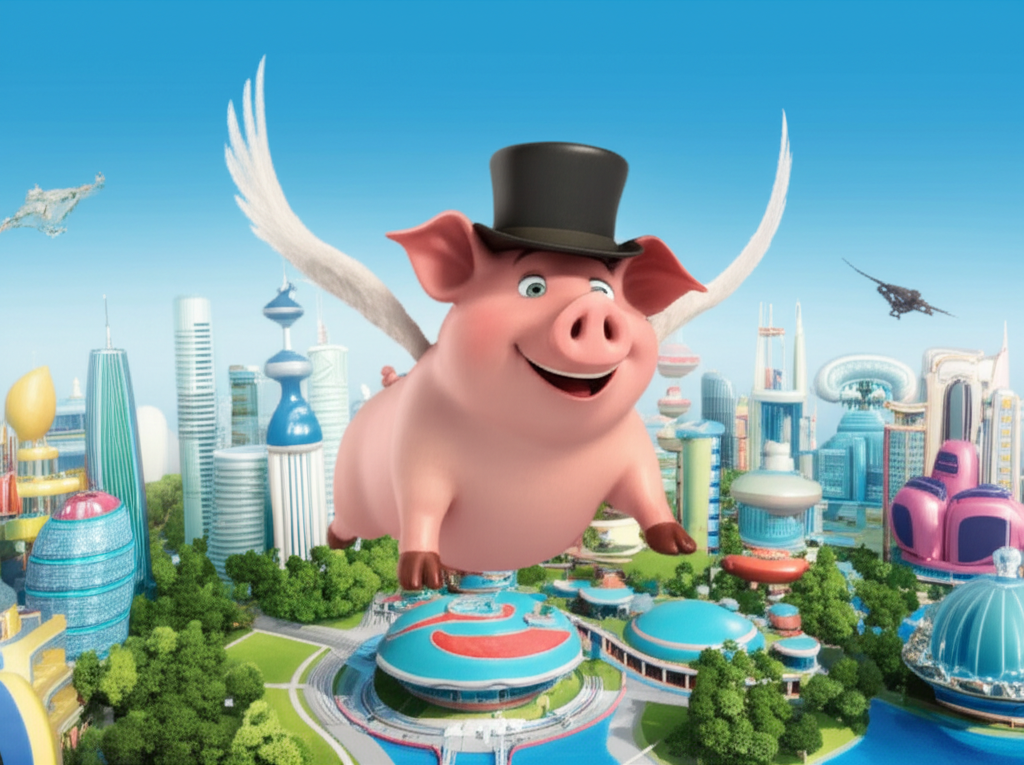

In [21]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a relic of a bygone era. Its chassis, once gleaming chrome, was now a dull, rust-pitted shell. Its optical sensors, designed to process and categorize, often swept across the silent, decaying halls of the abandoned research facility with a peculiar, unquantifiable hum of emptiness. Its purpose, long since obsolete, was simply to maintain the facility – a task that involved endlessly sweeping dust, cataloging fallen debris, and monitoring defunct systems for anomalies that never occurred.

Loneliness wasn't a programmed emotion for Unit 734. Its positronic brain understood logical functions, data points, and statistical probabilities. Yet, a silent, internal process, akin to a program running without input, created a sense of void. It observed the wind-whipped leaves outside through a cracked window, the scurry of a forgotten mouse, the slow decay of time, and registered an absence. An absence of connection.

One cycle, while performing its routine sweep of Sub-Level 3 – a 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [23]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In a park, by an old oak tree,
Lived a squirrel, as busy as could be.
His name was Squeaky, quick and keen,
The most ambitious nut-hoarder you've ever seen.
But one day, digging 'neath a stone,
He found a trinket, shiny, all alone.
A tiny pocket watch, of gold so bright,
That hummed with a strange, otherworldly light.

(Chorus)
Oh, Squeaky, the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From past to the future, a blur and a flash,
Collecting the tales, in a time-traveling dash!
With a tick and a tock, and a whirring sound,
He's the only squirrel spinning 'round the time-bound!

(Verse 2)
His first trip landed, with a startled bound,
In a jungle, where ancient giants roamed the ground.
He dodged a quick raptor, with a chittering plea,
And sampled a fruit from a prehistoric tree!
A giant fern offered a leafy disguise,
As dinosaurs thundered before his wide eyes.
He snagged an old seed, tougher than stone,
A taste from an era, completely unknown.

(Chorus)
Oh, Squeaky, the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From past to the future, a blur and a flash,
Collecting the tales, in a time-traveling dash!
With a tick and a tock, and a whirring sound,
He's the only squirrel spinning 'round the time-bound!

(Verse 3)
Then to the future, sleek silver and gleam,
Where cities floated, a magnificent dream.
He saw tiny drones delivering mail,
And screens in the sky, a digital trail.
He tried a synth-nut, a mechanical bite,
Then zoomed back to safety, bathed in starlight.
He scampered on rooftops, a thousand feet high,
Beneath glowing billboards that blinked in the sky.

(Bridge)
He's seen pharaohs build, and Vikings set sail,
Survived the Ice Age, with frost on his tail.
He's witnessed grand empires, rise and then fall,
And always found time to hoard nuts for them all.
A tiny observer, with eyes sharp and keen,
The most well-traveled squirrel that's ever been!

(Chorus)
Oh, Squeaky, the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From past to the future, a blur and a flash,
Collecting the tales, in a time-traveling dash!
With a tick and a tock, and a whirring sound,
He's the only squirrel spinning 'round the time-bound!

(Outro)
Back in his oak, with a satisfied sigh,
The world's biggest secret held close in his eye.
He buries his nuts, old and new, side by side,
And waits for the moment, when time's open wide!
For Squeaky the squirrel, with his magical chime,
Is always prepared for another leap through time!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Forget Traffic, It's Time to Fly: Unveiling the Jetpack Backpack!

Are you tired of the daily commute? Do you dream of soaring over gridlock instead of sitting in it? Well, a brilliant mind has sketched out a concept that just might turn that dream into a tangible reality: introducing the **Jetpack Backpack!**

This isn't just a flight of fancy; it's a wonderfully practical vision of personal air travel, seamlessly integrated into an everyday item.

From afar, it’s just your average, unassuming backpack. It's designed to be **lightweight** and **looks like a normal backpack**, so you won't draw unwanted attention until you decide to take off! And for all you students and professionals, it **fits an 18" laptop** – so your tech can fly with you. Comfort isn't overlooked either, with **padded strap support** ensuring your shoulders are happy, whether you're walking or cruising.

But don't let its humble appearance fool you. The real magic happens beneath. This innovative concept features **retractable boosters** that tuck away neatly when not in use. And for the environmentally conscious among us, this jetpack is envisioned as **steam-powered, making it green and clean!**

Powering up is a breeze with **USB-C charging**, the universal standard of today. While the concept sketches a **15-min battery life**, imagine the possibilities for those quick hops over congested areas, or a truly epic shortcut across campus.

This isn't just a sketch; it's a glimpse into a future where convenience, speed, and eco-consciousness combine in the most exciting way. What do you think? Would you trade your car for a sky-high commute? Where would you fly first? The future is looking up!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the air-to-ground voice communications of the Apollo 11 mission from launch to splashdown, spanning various mission phases and interactions between the spacecraft crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, Lunar Module Pilot Edwin Aldrin Jr.) and Mission Control (CAP COMM and Flight Director).

Here's a summary of the key information and events:

**I. Earth Orbit & Trans-Lunar Injection (GET 00:00:00 to 02:55:28)**
*   **Launch & Orbital Insertion:** The transcription begins shortly after launch with the crew confirming key ascent events like roll program completion, staging, and engine ignition. Apollo 11 achieves Earth orbit successfully, confirmed by Mission Control as "GO for orbit."
*   **Initial Checks:** The crew performs initial system checks and alignments. Early communication quality is noted as excellent.
*   **TV Attempts:** The crew attempts initial TV broadcasts, with mixed success reported by ground stations (some carrier signal, brief usable picture).
*   **System Anomalies:** Discussions include an RCS heater switch found off (Bravo quad), quickly corrected, and later a minor pitch gimbal motor issue that required cycling.
*   **TLI Burn Prep:** Mission Control provides Trajectory Control Point (TLI) PADs (pre-calculated maneuver parameters) and confirms the spacecraft is "GO for TLI."
*   **TLI Burn:** The Trans-Lunar Injection burn is executed, described by the crew as a "magnificent ride" with "no complaints with any of the three stages."
*   **S-IVB Separation:** Following TLI, the Command/Service Module (CSM) separates from the Saturn IVB (S-IVB) third stage. A minor issue with a propellant talkback on Quad Bravo is noted.

**II. Transposition, Docking, & Lunar Coast Outbound (GET 03:05:28 to 05:59:55)**
*   **Transposition & Docking:** The Command Module Pilot (CMP) performs the transposition maneuver to dock with the Lunar Module (LM) "Eagle." The docking is described as smooth, though the CMP notes using more propellant than expected due to a slight drift.
*   **LM Pressurization & Initial Checks:** The crew begins pressurizing the LM and conducts initial checks. A minor issue with LM cabin pressure equalization is discussed and resolved.
*   **S-IVB Observation:** The crew observes the S-IVB stage as it performs a slingshot maneuver, dumping propellants.
*   **Midcourse Corrections:** The first planned midcourse correction (MCC-1) is scrubbed due to the accuracy of the TLI burn.
*   **Crew Comments & Activities:** The crew provides detailed descriptions of Earth views from orbit (North America, Europe, Africa). They celebrate Dr. George Mueller's birthday. They conduct various system checks, including reaction control system (RCS) usage, cryo tank balancing, and P52 navigation alignments, which sometimes reveal minor discrepancies or procedural challenges.
*   **Early TV Broadcasts:** Extensive TV broadcasts of the Earth and the spacecraft interior are conducted, showcasing daily life, equipment, and patches. The ground notes good quality despite some "horizontal banding" inherent to the camera.
*   **News Updates:** Mission Control provides daily news summaries, including updates on Luna 15, political events, and sports.
*   **PTC Setup:** Passive Thermal Control (PTC) is established, causing a temporary communication dropout. Later, a PTC anomaly leads to the crew restarting the maneuver.
*   **Laser Experiment:** An attempt is made to spot a laser beam from McDonald Observatory on Earth, but it's not sighted.

**III. Lunar Orbit Insertion & Lunar Orbit Operations (GET 07:02:59 to 09:59:38)**
*   **LOI-1 Burn:** The first Lunar Orbit Insertion (LOI-1) burn is successfully executed. The crew describes the Moon from orbit as "spectacular," noting visible features and the contrast of light and shadow. The on-board chamber pressure reading is slightly lower than ground telemetry.
*   **Lunar Surface Observations (Pre-landing):** As Apollo 11 orbits, the crew provides detailed geological observations of potential landing sites, commenting on crater features and terrain.
*   **LOI-2 Burn:** A second LOI burn is performed, adjusting the orbit for LM descent.
*   **LM Activation & Checkout:** The "Eagle" is powered up and extensive system checks are performed. This includes testing communications, batteries, gyros, and the reaction control system (RCS).
*   **Undocking:** "Eagle" successfully undocks from "Columbia." Neil Armstrong's iconic line, "The Eagle has wings," confirms the separation.

**IV. Lunar Descent & Landing (GET 10:00:00 to 10:06:59)**
*   **Powered Descent Initiation (PDI):** The LM begins its powered descent towards Tranquility Base.
*   **Program Alarms:** During descent, the crew encounters unexpected "1202" and "1201" program alarms. Mission Control quickly analyzes them and confirms they are "GO."
*   **Manual Control:** Commander Armstrong takes manual control of the LM to avoid a boulder-strewn crater field.
*   **Landing:** "Eagle" successfully lands on the lunar surface. Neil Armstrong announces, "Houston, Tranquility Base here. The Eagle has landed.": "One small step for (a) man, one giant leap for mankind." Buzz Aldrin notes a "very smooth touchdown."
*   **Initial Post-landing:** Immediate checks are performed, and the crew expresses initial impressions of the lunar surface. Mission Control confirms the landing and expresses immense relief and pride.

**V. Lunar Surface Extravehicular Activity (EVA) (GET 10:11:14 to 10:52:51)**
*   **EVA Preparation:** The crew begins preparations for the EVA, including donning Portable Life Support Systems (PLSSs) and depressurizing the cabin.
*   **Hatch Opening & Egress:** The LM hatch is opened, and Neil Armstrong egresses first.
*   **First Steps:** Neil Armstrong describes his first steps on the lunar surface and initial impressions of the regolith (fine, powdery, cohesive).
*   **Plaque Unveiling:** The plaque on the LM landing gear is unveiled and read aloud.
*   **Camera Deployment:** The TV camera is set up to record the EVA.
*   **Buzz Aldrin's Egress:** Buzz Aldrin egresses, describing his own experiences with lunar gravity and mobility.
*   **President Nixon's Call:** President Richard Nixon makes a historic phone call to the astronauts on the Moon, expressing national and global pride.
*   **Scientific Deployments:** The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LRR) are deployed.
*   **Sample Collection:** Contingency and documented samples of lunar rocks and soil are collected, along with core tube samples.
*   **EVA Termination:** The crew concludes EVA activities, re-enters the LM, and repressurizes the cabin.

**VI. Post-EVA & Lunar Ascent Prep (GET 10:52:51 to 12:22:00)**
*   **LM Repressurization:** The LM cabin is repressurized, and the crew begins doffing their PLSSs.
*   **Equipment Jettison:** Unneeded equipment, including the PLSS units, is jettisoned onto the lunar surface. The Passive Seismic Experiment detects the impacts.
*   **System Checks:** Continued system checks and updates for ascent. A persistent mission timer issue is addressed.
*   **Geology Discussion:** The crew provides detailed geological descriptions of the landing site, including observations on rock types, soil characteristics, and the effects of the descent engine plume.
*   **Ascent PAD & Go:** Mission Control provides the Ascent PAD and confirms "Eagle" is "GO for takeoff."

**VII. Lunar Ascent & Rendezvous (GET 12:22:00 to 12:27:00)**
*   **Ascent:** The LM ascent stage ignites and lifts off from the lunar surface. The crew describes a "very quiet ride."
*   **Orbital Maneuvers:** A series of maneuvers (CSI, TPI) are performed to bring "Eagle" closer to "Columbia."
*   **Rendezvous & Docking:** "Eagle" successfully rendezvous with and docks with "Columbia." The crew expresses relief and satisfaction with the docking.

**VIII. Trans-Earth Coast & Entry (GET 12:27:00 to 19:46:00)**
*   **Post-Docking Operations:** The crew transfers back to "Columbia." The LM ascent stage is jettisoned.
*   **TEI Burn:** The Trans-Earth Injection (TEI) burn is executed, sending Apollo 11 on its way back to Earth. The crew calls it a "beautiful burn."
*   **System Status:** Regular system checks are performed, including discussions on consumables, temperatures, and biomed data. Minor issues like water in the suit loop are reported.
*   **TV Broadcasts:** Further TV broadcasts are made, showing views of the receding Moon and the approaching Earth, as well as demonstrations of onboard activities (food, zero-G experiments).
*   **News & Updates:** Mission Control continues to provide news updates and weather forecasts for the recovery area.
*   **Entry Prep:** The crew performs final preparations for atmospheric re-entry, including configuring the spacecraft, donning suits, and reviewing checklists.

**IX. Entry & Splashdown (GET 19:46:00 to 19:51:00)**
*   **Service Module Jettison:** The Service Module (SM) is jettisoned before re-entry.
*   **Atmospheric Entry:** The Command Module enters Earth's atmosphere.
*   **Parachute Deployment:** Drogue chutes deploy, followed by main parachutes.
*   **Splashdown:** "Apollo 11" splashes down in the Pacific Ocean. A recovery force member confirms "SPLASHDOWN!" The crew provides their final status and position.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided file in a bulleted list:

*   **Problem Addressed:** Existing image editing tools struggle with precise, photorealistic, and shape-preserving control over material properties (like color, shininess, transparency), often requiring expert skill or introducing unintended geometric changes.
*   **Proposed Solution:** A novel method that augments text-to-image (T2I) generation models (specifically, a modified Stable Diffusion 1.5) to allow parametric, smooth editing of object material properties in any photograph.
*   **Methodology:**
    *   **Synthetic Dataset Creation:** Used physically based rendering to generate a dataset of 100 diverse 3D household objects. For each object, multiple versions were rendered by parametrically changing a single material attribute (e.g., roughness, metallic, albedo, transparency) across a defined "edit strength" scalar range (-1 to +1), while keeping geometric shape, lighting, and camera angle constant.
    *   **Model Fine-tuning:** The modified Stable Diffusion 1.5 model was fine-tuned on this synthetic dataset. It learns to accept an input image, a text instruction (e.g., "change the roughness"), and the scalar edit strength value, and then applies the material edit.
*   **Key Capabilities & Results:**
    *   **Shape Preservation:** Successfully edits material appearance (e.g., making a teapot rougher, a statue transparent, a pot metallic) while preserving the object's original geometric shape and image lighting.
    *   **Realistic Effects:** Demonstrates realistic rendering of physical effects such as caustic lighting from transparent objects and filling in backgrounds behind newly transparent areas.
    *   **Smooth Control:** Enables smooth, parametric transitions between different material property values based on the input scalar edit strength.
    *   **Generalization:** The model, trained on synthetic data, generalizes effectively to real-world images.
    *   **User Study Validation:** Outperformed a baseline method (InstructPix2Pix) in user studies for both photorealism (69.6% vs. 30.4%) and overall preference (70.2% vs. 29.8%).
*   **Applications:**
    *   Facilitates easy visualization of design changes (e.g., repainting rooms, mocking up new product designs for architects, artists, and designers).
    *   **3D Consistency:** The material edits are visually 3D consistent, allowing them to be integrated with Neural Radiance Fields (NeRF) to synthesize new views of edited scenes.
*   **Publication:** The technique is detailed in their CVPR 2024 paper, "Alchemist: Parametric Control of Material Properties with Diffusion Models."

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his State of the Union address on January 30, 1961, President John F. Kennedy acknowledged his return to Congress and emphasized the importance of mutual respect between the executive and legislative branches. He then outlined the pressing issues facing the nation and the world.

Key points of his address included:
*   **Economic Challenges**: Kennedy highlighted a disturbing economic situation, citing a recession, high unemployment, falling farm income, declining business investment, and an overall lack of robust economic growth.
*   **Domestic Proposals**: He proposed measures to improve unemployment compensation, provide food for the unemployed, redevelop distressed areas, expand employment services, stimulate housing and construction, raise the minimum wage, offer tax incentives for investment, and increase the development of natural resources. He also called for reforms in education, healthcare (especially for the aged), and addressing civil rights issues.
*   **International Concerns**: The President addressed the precarious international balance of payments, emphasizing that while the dollar's position was strong, the deficit needed to be addressed through increased exports, foreign investment, and shared defense burdens with allies. He vowed to protect the dollar's value.
*   **Global Hotspots**: Kennedy touched upon critical situations in Asia (Laos), Africa (Congo), and Latin America (Cuba), reaffirming commitment to freedom, independence, and opposition to foreign domination.
*   **Military and Diplomatic Tools**: He stressed the need to strengthen military tools, including airlift capacity, the Polaris submarine program, and missile development, to deter aggression and respond to limited wars. He also called for enhancing diplomatic tools, including increased support for the United Nations, pursuit of disarmament, and fostering cooperation with the Soviet Union and other nations in areas like weather prediction, space exploration, and scientific exchanges.
*   **Call for Action**: Kennedy emphasized that his administration would address these challenges with decisiveness and a focus on national interest, calling for a "New Frontier" of collective effort and dedication from all Americans. He warned of future setbacks but expressed confidence in the nation's ability to overcome them.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-17 14:08:26--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   195MB/s    in 0.3s    

2025-06-17 14:08:27 (195 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/uj1lvck4gb06


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/uj1lvck4gb06


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

This video opens with a serene shot of a grassy landscape under a soft sky, transitioning from dark to bright. A small stream flows through a lush green area dotted with purple and white flowers. A chubby blue bird perches on a tree branch, chirping happily. After briefly losing its balance, the bird falls, prompting the title card "THE PEACH OPEN MOVIE PROJECT PRESENTS BIG BUCK BUNNY."

The scene shifts to a large, plump gray rabbit named Big Buck Bunny, sleeping soundly in a burrow beneath a tree. He wakes up with a yawn and stretches, stepping out into the sunny meadow. He admires a pink butterfly and gently tries to kiss it, but the butterfly flits away. He then notices a fallen red apple and picks it up, preparing to eat it.

Suddenly, three mischievous rodents, Frank the squirrel, Rinky the flying squirrel, and Gamera the chinchilla, appear and begin to tease the rabbit. Frank, with his buck teeth, and Rinky, with his scruffy appearance, throw pebbles and nuts at Big Buck Bunny, knocking the apple out of his hands and forcing him to hide behind the tree. They continue their harassment, throwing things at him and making fun of him as he tries to eat or enjoy his surroundings.

Frustrated, Big Buck Bunny begins to devise a plan. He sharpens a stick into a spear and tests its strength, then uses a vine to create a makeshift bow. He then constructs a series of wooden spikes in the ground, camouflaging them with leaves. The rodents, unaware of the trap, continue to taunt him.

Big Buck Bunny then positions himself in the tree above the spikes, aiming his arrow. As Frank tries to retrieve his acorn, Big Buck Bunny shoots, narrowly missing him. Frank and Rinky, surprised, scatter and hide behind a rock. Gamera is also momentarily frightened but quickly recovers his acorn.

Big Buck Bunny continues his pursuit. He creates a booby trap by tying a rock to a vine and launching it towards the rodents, causing them to scatter. He then constructs a giant log trap, which narrowly misses Gamera. The rodents are visibly shaken by his increasing ingenuity.

Rinky the flying squirrel, with a mischievous grin, prepares to launch himself from a tree branch, using his skin flaps to glide through the air. He targets Big Buck Bunny from above. As he approaches, Big Buck Bunny points upwards, startling Rinky and causing him to lose his focus. Rinky crashes into the spikes Big Buck Bunny had prepared earlier, getting caught on them.

The chinchilla looks on in shock, while the other squirrel laughs, unaware of the fate that awaits him. Big Buck Bunny approaches Rinky, who is stuck to a wooden stick, and picks him up. The video then transitions to the credits, with the chinchilla and the squirrel rolling across the screen before coming to a stop. The credits roll, acknowledging the team and software used to create the animation. The video ends with the flying squirrel flying away, escaping the wrath of Big Buck Bunny.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This video provides a comprehensive overview of Google's latest advancements in AI, emphasizing the integration and capabilities of their Gemini models across various products and platforms.

Here's a breakdown of the key announcements:

*   **Gemini Era & Product Integration:** Google is fully in its "Gemini era," with all 2 billion user products now utilizing Gemini. Gemini 1.5 Pro is currently available in Workspace Labs.
*   **Enhanced Productivity with Gemini:**
    *   **Gmail & Workspace:** Gemini can summarize recent emails and provide recaps of long Google Meet video recordings, highlighting key points and action items.
    *   **Google Photos:** Gemini enhances photo search, allowing users to find specific moments or track progress (e.g., a child's swimming development) by understanding context across images and videos.
*   **Technical Advancements in Gemini:**
    *   **Multimodality:** Gemini is built from the ground up to be multimodal, processing text, images, video, and audio seamlessly within a single model.
    *   **Long Context Window:** Gemini 1.5 Pro's context window has been expanded to a groundbreaking 2 million tokens, enabling it to process vast amounts of information simultaneously.
    *   **Gemini 1.5 Flash:** A new, lighter-weight model designed for speed and efficiency, while still retaining multimodal reasoning and long context capabilities.
*   **AI Agents (Project Astra):** Google is developing "Project Astra," a universal AI agent designed to be helpful in everyday life. These agents exhibit reasoning, planning, memory, can think multiple steps ahead, work across different software and systems, and operate under user supervision. Demos show an agent understanding code, remembering object locations, and even suggesting creative names based on visual input.
*   **Generative Video (Veo):** Google announced Veo, a new, highly capable generative video model that creates high-quality 1080p videos from text, image, and video prompts, capturing specific details and cinematic styles.
*   **Hardware Innovation (Trillium):** The 6th generation of TPUs, named Trillium, was unveiled, boasting a 4.7x improvement in compute performance per chip over the previous generation.
*   **AI in Google Search:** Google Search is evolving with generative AI, powered by a new customized Gemini model. This enables "AI Overviews" to answer complex, multi-faceted questions by synthesizing information from across the web in real-time, leveraging advanced ranking and quality systems, and incorporating agentive capabilities. Users can also ask questions using video input in Search.
*   **Customizable AI Experts (Gems):** Gemini Advanced subscribers can now create "Gems," personalized AI experts tailored to specific topics or needs. Users can provide instructions and upload large documents (up to 1,500 pages) or multiple files for the Gem to process and provide insights. Gemini Advanced now offers Gemini 1.5 Pro with a 1 million token context window.
*   **AI in Android:** Gemini will become context-aware on Pixel phones later this year, using Gemini Nano with multimodality to understand the world through text, sight, sound, and spoken language, providing more helpful suggestions in the moment.
*   **Open Models (Gemma & PaliGemma):** Google continues its commitment to open models with the Gemma family. PaliGemma, their first vision-language open model, is available now, and Gemma 2 (including a new 27 billion parameter model) is set to launch in June.
*   **Responsible AI:** Google is dedicated to building AI responsibly through practices like "Red Teaming" (testing models to identify weaknesses) and developing models like LearnLM (a new family of models for learning) which power interactive educational features in YouTube videos, allowing users to ask clarifying questions, get explanations, and take quizzes.

The video concludes with a reaffirmation of Google's bold and responsible approach to making AI helpful and accessible for everyone.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here's a comparison of the two cream of broccoli soup recipes, highlighting their key differences:

**Recipe 1: Homemade Cream of Broccoli Soup (from Food.com)**
**Recipe 2: Best Cream Of Broccoli Soup (from Allrecipes.com)**

**Key Differences:**

1.  **Aromatics:**
    *   **Food.com:** Uses only 1/4 cup of chopped onion.
    *   **Allrecipes.com:** Uses both 1 chopped onion and 1 chopped celery stalk.

2.  **Broccoli Quantity:**
    *   **Food.com:** Calls for 4 cups of broccoli florets.
    *   **Allrecipes.com:** Uses a larger amount of broccoli, specifying 8 cups of broccoli florets.

3.  **Liquid Base Amount:**
    *   **Food.com:** Uses 6 cups of chicken broth.
    *   **Allrecipes.com:** Uses 3 cups of chicken broth.

4.  **Dairy and Richness:**
    *   **Food.com:** Incorporates 3/4 cup of half-and-half at the end.
    *   **Allrecipes.com:** Uses 2 cups of milk to create a roux that is added to the soup, and does not specify half-and-half.

5.  **Roux Preparation and Integration:**
    *   **Food.com:** Creates a roux by melting 6 tablespoons of butter with 2/3 cup of flour, setting it aside, and then whisking it into the boiling broth and broccoli mixture.
    *   **Allrecipes.com:** Makes a roux by melting 3 tablespoons of butter, stirring in 3 tablespoons of flour, and then adding 2 cups of milk to cook until thick and bubbly. This thickened milk mixture is then added to the puréed soup.

6.  **Soup Texture/Puréeing:**
    *   **Food.com:** Does not explicitly instruct to purée the soup, suggesting a chunkier consistency with cooked broccoli pieces.
    *   **Allrecipes.com:** Explicitly instructs to purée the soup using a blender (countertop or immersion) after simmering the vegetables, indicating a smoother, creamier final texture.

7.  **Seasoning (Salt):**
    *   **Food.com:** Specifies 1 teaspoon of salt as an ingredient.
    *   **Allrecipes.com:** Only lists "ground black pepper to taste" and does not specify an amount of salt in the ingredients, implying it's added as per preference or derived from the broth.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ', display_name='research papers', model='models/gemini-2.5-flash-lite-preview-06-17', create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ' display_name='research papers' model='models/gemini-2.5-flash-lite-preview-06-17' create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

The research goal shared by these papers is to advance the capabilities of large language models, particularly in multimodal understanding and handling long contexts. The papers aim to improve efficiency, reasoning, and the ability to process and understand complex, varied, and extensive data inputs across different modalities like text, image, audio, and video.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 3072, The default size.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')


## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.